In [2]:
!pip install arch

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import datetime as dt
import arch.data.sp500
import pandas as pd
import numpy as np
import warnings

pd.set_option('max_colwidth',100)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

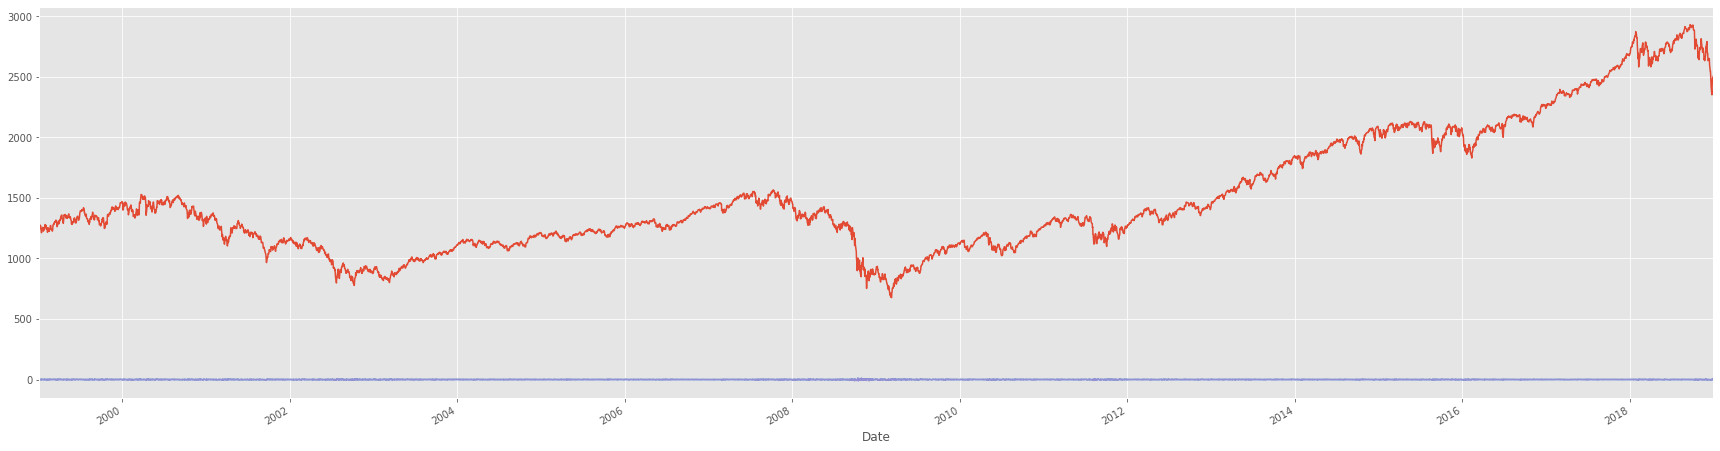

In [5]:
st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)
data = arch.data.sp500.load()
market = data["Adj Close"]
market.plot(figsize=(30,8))
returns = 100 * market.pct_change().dropna() # ut : returns
returns_df = pd.DataFrame(returns).rename(columns={'Adj Close':'returns'})
ax = returns.plot(figsize=(30,8))
xlim = ax.set_xlim(returns.index.min(), returns.index.max())
returns.plot(figsize=(30,8))

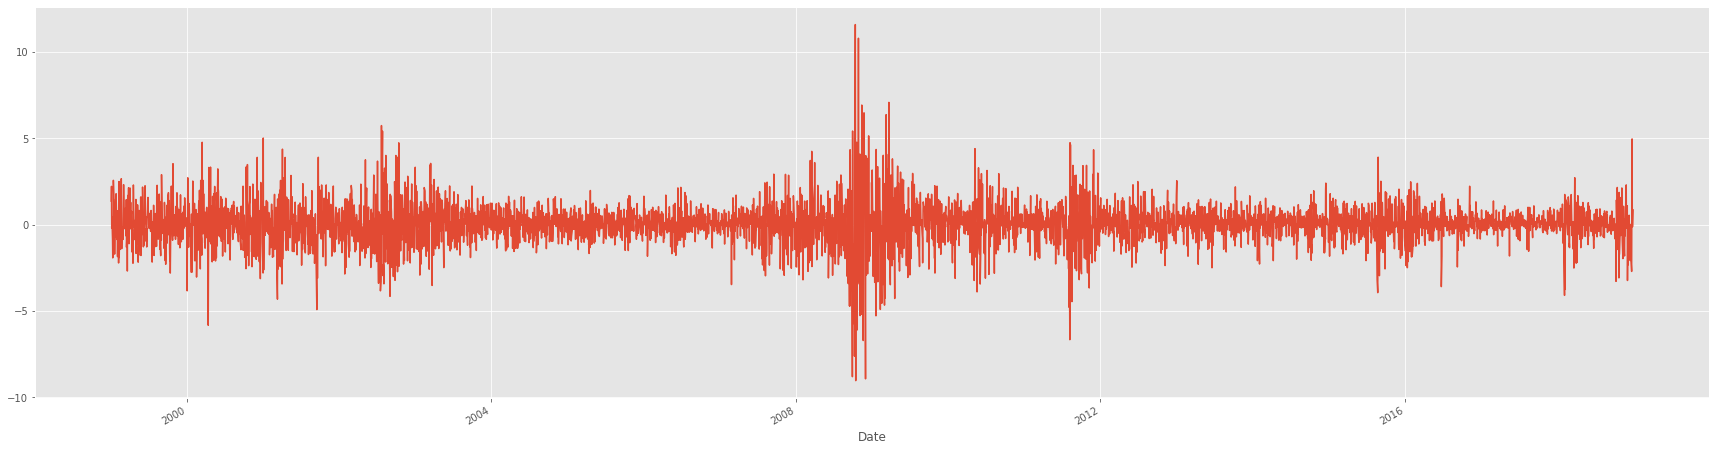

In [6]:
returns.plot(figsize=(30,8))

In [15]:
from arch import arch_model

arch_model_fited = arch_model(returns, vol="Garch", p=1, o=0, q=1).fit()
print(arch_model_fited.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6955.831420300672
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6951.317990601591
Iteration:      3,   Func. Count:     24,   Neg. LLF: 6947.064616329776
Iteration:      4,   Func. Count:     32,   Neg. LLF: 6946.364744328592
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6942.159545349871
Iteration:      6,   Func. Count:     46,   Neg. LLF: 6939.773137356007
Iteration:      7,   Func. Count:     53,   Neg. LLF: 6938.412704297494
Iteration:      8,   Func. Count:     60,   Neg. LLF: 6936.760006660004
Iteration:      9,   Func. Count:     66,   Neg. LLF: 6936.741980335761
Iteration:     10,   Func. Count:     72,   Neg. LLF: 6936.71852988723
Iteration:     11,   Func. Count:     78,   Neg. LLF: 6936.718477489485
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11

In [16]:
0.0175/(1-(0.1022+0.8852))

1.3888888888888828

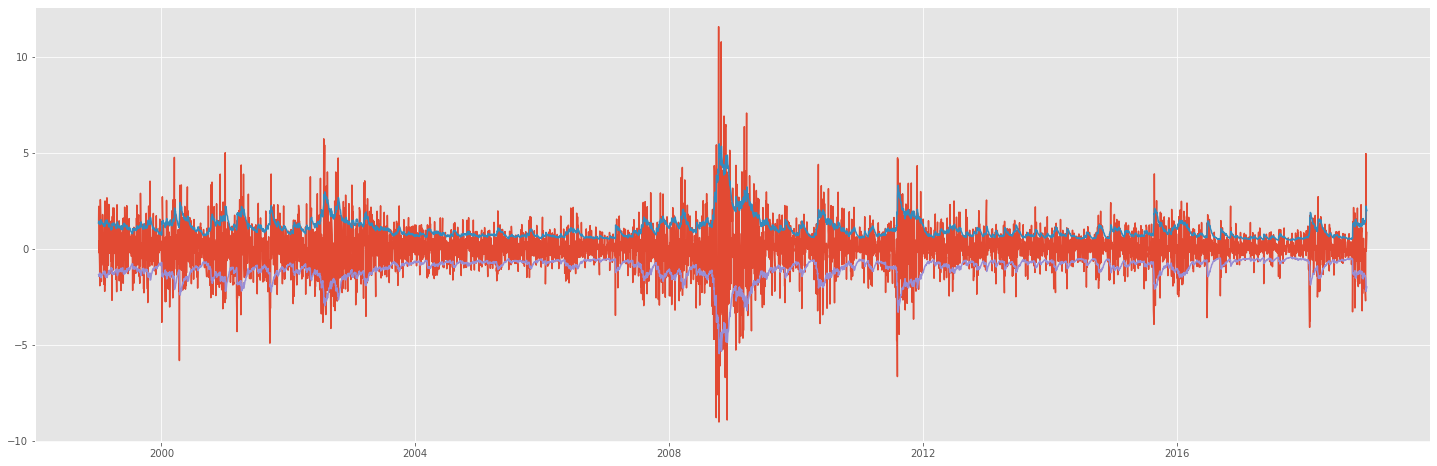

In [17]:
fig, ax = plt.subplots(figsize=(25, 8))
ax.plot(returns, label='retornos')
ax.plot(arch_model_fited.conditional_volatility,  label='volatilidad')
ax.plot(-1*arch_model_fited.conditional_volatility,  label='volatilidad')

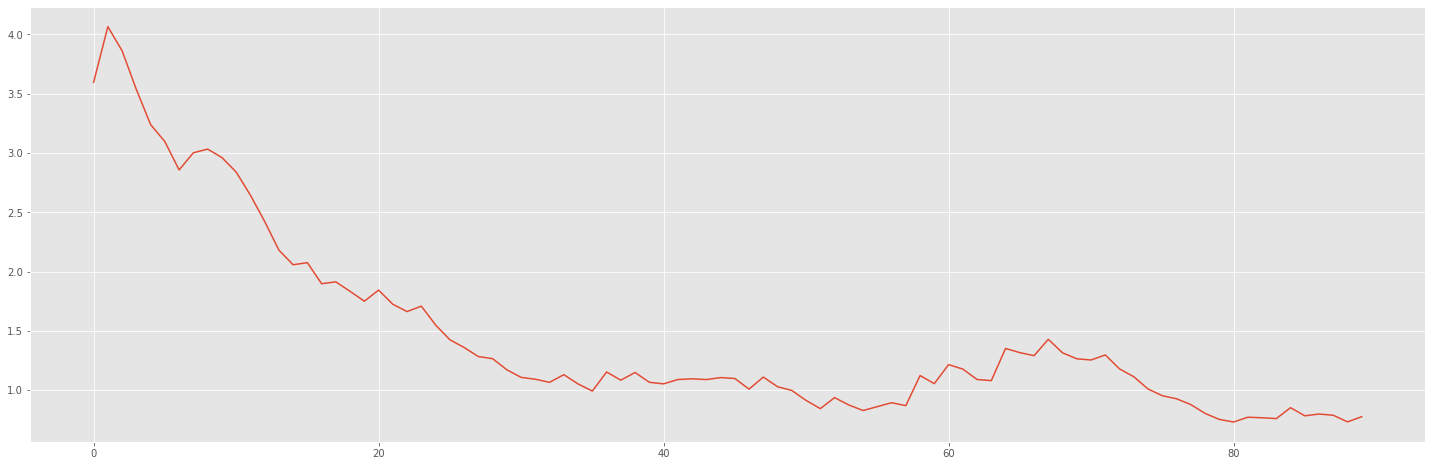

In [18]:
forecasts = arch_model_fited.forecast(start=dt.datetime(2018, 12, 31),
                                      horizon=30*3, 
                                      method="bootstrap", 
                                      simulations=5)
simulations = forecasts.simulations
fig, ax = plt.subplots(figsize=(25, 8))
line = ax.plot(forecasts.variance.iloc[-1].values)
line[0].set_label("Expected variance")